In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


# Un primer analisis de los DF

## Clicks

In [183]:
clicks = pd.read_csv('clicks.csv',low_memory=False)#, dtype = {'advertiser_id' : np.int8, 'action_id' : np.float16, 'source_id' : np.int8, 'latitud': np.float16, 'longitude': np.float32, 'carrier_id': np.float16, 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, 'touchY': np.float64})
clicks.describe()

,advertiser_id,action_id,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,"26,351.00",0.00,"26,351.00","26,351.00","26,351.00","26,351.00","26,340.00","26,339.00","3,243.00","26,339.00","26,351.00","6,235.00","22,977.00","23,011.00","23,011.00","26,351.00","26,351.00"
mean,2.99,nan,1.25,"6,333,597,102,633,179,136.00",1.21,1.07,7.74,"4,635,374,575,985,132,544.00","4,171,028,491,311,782,912.00","3,913,451,148,456,457,728.00","1,299,054,512,171,520,000.00",1.48,230.40,0.64,1.48,"1,888,100,205,004,328,192.00","4,611,580,963,364,695,552.00"
std,0.16,nan,2.19,"208,899.96",0.00,0.00,7.02,"1,642,969,071,347,074,304.00","2,460,496,331,949,355,520.00","1,885,865,608,589,602,304.00","1,149,672,410,494,738,688.00",1.58,976.85,0.30,2.62,"172,125,233,078,469,472.00","2,673,174,670,337,705,472.00"
min,0.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.06,0.00,"666,662,581,457,410,816.00","45,136,183,396,133,872.00","743,648,083,229,004,800.00","392,184,377,613,097,984.00",0.00,0.02,0.00,0.00,"1,494,519,392,962,156,800.00","928,619,179,373,370.00"
25%,3.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.07,3.00,"3,378,639,948,496,604,672.00","1,975,182,886,055,770,368.00","1,774,085,102,589,090,048.00","392,184,377,613,097,984.00",0.00,2.92,0.43,0.18,"1,891,515,180,541,284,352.00","2,273,798,380,684,567,552.00"
50%,3.00,nan,0.00,"6,333,597,102,633,388,032.00",1.21,1.07,6.00,"3,511,537,816,949,900,288.00","3,516,811,792,181,616,128.00","3,072,849,339,937,028,096.00","392,184,377,613,097,984.00",1.00,10.59,0.73,0.65,"1,891,515,180,541,284,352.00","4,623,720,809,049,035,776.00"
75%,3.00,nan,1.00,"6,333,597,102,633,388,032.00",1.21,1.07,13.00,"6,391,567,095,202,500,608.00","6,589,621,704,049,354,752.00","4,566,453,911,975,694,336.00","2,733,035,977,666,442,752.00",2.00,71.70,0.90,0.99,"1,891,515,180,541,284,352.00","6,917,850,278,446,808,064.00"
max,8.00,nan,10.00,"6,333,597,102,633,388,032.00",1.24,1.09,116.00,"9,081,081,953,394,761,728.00","9,221,733,410,395,374,592.00","7,499,731,952,750,279,680.00","8,930,605,132,947,906,560.00",13.00,"17,616.19",1.00,16.60,"6,323,871,695,571,587,072.00","9,221,118,223,027,605,504.00"


In [14]:
clicks = clicks.drop(clicks.columns[[1]], axis='columns')

## Installs

In [262]:
installs = pd.read_csv('installs.csv',low_memory=False, parse_dates = ['created'])
installs.describe()

,application_id,ref_type,ref_hash,click_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,"3,412.00","3,412.00","3,412.00",0.00,"3,412.00","1,047.00","3,411.00","3,412.00","3,378.00"
mean,10.25,"1,736,533,237,676,398,080.00","4,598,201,895,093,175,296.00",nan,"4,764,400,876,953,753,600.00","1,877,863,611,061,168,896.00","4,245,275,763,008,425,984.00","4,562,039,566,821,860,864.00","4,915,828,330,143,634,432.00"
std,6.02,"193,697,630,282,642,944.00","2,663,827,726,655,556,608.00",nan,"1,678,050,662,913,425,408.00","1,886,461,185,004,080,128.00","2,620,843,701,431,818,752.00","2,683,422,255,419,026,432.00","2,477,019,279,750,212,608.00"
min,0.00,"1,494,519,392,962,156,800.00","4,958,526,679,100,225.00",nan,"2,970,470,518,450,881,024.00","308,305,860,557,778,688.00","51,125,050,827,768,144.00","7,118,753,876,860,506.00","110,153,915,248,271,648.00"
25%,7.00,"1,494,519,392,962,156,800.00","2,268,352,778,868,107,520.00",nan,"2,970,470,518,450,881,024.00","308,305,860,557,778,688.00","2,331,946,610,914,169,856.00","2,249,196,592,953,800,448.00","3,301,377,775,977,699,840.00"
50%,9.00,"1,891,515,180,541,284,352.00","4,603,806,636,293,553,152.00",nan,"6,333,597,102,633,388,032.00","2,208,834,667,126,999,296.00","2,983,637,540,473,392,128.00","4,436,112,593,864,796,160.00","3,301,377,775,977,699,840.00"
75%,10.00,"1,891,515,180,541,284,352.00","6,912,403,645,454,140,416.00",nan,"6,333,597,102,633,388,032.00","2,523,245,982,232,924,160.00","6,882,414,520,414,359,552.00","7,017,563,642,532,624,384.00","6,977,049,253,562,486,784.00"
max,36.00,"1,891,515,180,541,284,352.00","9,218,934,271,985,603,584.00",nan,"6,333,597,102,633,388,032.00","9,169,526,525,480,200,192.00","9,222,450,236,218,316,800.00","9,221,949,873,099,484,160.00","9,028,382,655,101,200,384.00"


## Events

In [72]:
events = pd.read_csv('events.csv',low_memory=False)
events.describe()

,event_id,ref_type,ref_hash,application_id,device_countrycode,device_os_version,device_brand,device_model,device_city,session_user_agent,user_agent,carrier,kind,device_os,ip_address,device_language
count,"2,494,423.00","2,494,423.00","2,494,423.00","2,494,423.00","2,494,423.00","1,022,066.00","1,164,963.00","2,406,456.00","614,698.00","2,482,637.00","1,391,527.00","616,434.00","2,489,324.00","657,667.00","2,494,423.00","2,406,604.00"
mean,99.70,"1,794,164,256,795,212,032.00","4,641,485,622,867,350,528.00",99.11,"6,333,597,102,455,528,448.00","4,986,000,883,818,123,264.00","1,633,891,259,718,531,072.00","4,478,846,505,738,718,208.00","3,832,628,101,279,853,568.00","4,719,312,050,498,116,608.00","4,856,491,860,679,126,016.00","1,470,186,242,392,854,784.00","5,364,362,336,789,876,736.00","7,251,101,319,934,607,360.00","4,620,786,112,341,465,088.00","5,865,446,733,566,830,592.00"
std,107.09,"170,794,367,559,915,584.00","2,660,724,289,271,803,392.00",57.81,"177,859,619.65","2,394,833,504,172,234,240.00","1,626,674,037,394,022,144.00","2,718,013,665,266,283,008.00","816,691,109,350,281,600.00","1,769,561,008,960,695,296.00","2,487,551,899,697,328,640.00","2,575,961,694,694,120,960.00","2,242,979,336,308,756,992.00","524,706,570,701,413,056.00","2,672,745,651,959,583,744.00","2,281,192,028,856,060,928.00"
min,0.00,"1,494,519,392,962,156,800.00","163,367,509,015,039.00",0.00,"6,333,597,102,633,388,032.00","10,040,843,832,529,456.00","79,497,372,824,783,648.00","953,021,617,676,575.00","43,554,277,262,821,912.00","5,527,631,326,747,661.00","5,072,532,336,568,830.00","224,815,696,425,431,552.00","77,582,699,812,751,584.00","2,748,831,357,052,530,688.00","5,287,755,497,790.00","20,258,091,302,922,576.00"
25%,22.00,"1,891,515,180,541,284,352.00","2,326,142,441,496,693,248.00",63.00,"6,333,597,102,633,388,032.00","4,353,750,324,650,096,640.00","308,305,860,557,778,688.00","2,331,946,610,914,169,856.00","3,800,079,948,896,775,168.00","3,819,516,403,548,393,472.00","2,723,465,380,175,812,096.00","224,815,696,425,431,552.00","4,647,948,847,353,587,712.00","6,941,824,626,260,379,648.00","2,333,410,376,606,465,024.00","3,301,377,775,977,699,840.00"
50%,31.00,"1,891,515,180,541,284,352.00","4,688,963,740,843,105,280.00",66.00,"6,333,597,102,633,388,032.00","4,353,750,324,650,096,640.00","513,799,204,676,421,248.00","4,430,578,686,563,703,296.00","3,800,079,948,896,775,168.00","3,819,516,403,548,393,472.00","5,022,935,528,844,702,720.00","224,815,696,425,431,552.00","5,500,848,327,478,995,968.00","7,531,669,329,342,817,280.00","4,541,497,563,438,053,888.00","6,804,427,935,983,149,056.00"
75%,161.00,"1,891,515,180,541,284,352.00","6,927,593,502,409,069,568.00",145.00,"6,333,597,102,633,388,032.00","7,391,843,585,977,942,016.00","2,987,569,314,309,514,240.00","6,882,414,520,414,359,552.00","3,800,079,948,896,775,168.00","7,164,321,382,499,454,976.00","6,840,860,440,298,271,744.00","1,179,587,256,014,013,184.00","6,169,666,708,835,518,464.00","7,531,669,329,342,817,280.00","7,044,306,561,191,919,616.00","6,977,049,253,562,486,784.00"
max,712.00,"1,891,515,180,541,284,352.00","9,223,315,715,583,246,336.00",322.00,"6,333,597,102,633,388,032.00","9,135,481,865,204,238,336.00","9,178,259,689,881,448,448.00","9,222,450,236,218,316,800.00","9,205,668,653,536,568,320.00","9,220,948,949,898,063,872.00","9,223,276,648,564,463,616.00","9,182,956,943,749,254,144.00","9,215,473,431,008,654,336.00","7,531,669,329,342,817,280.00","9,223,367,224,755,889,152.00","9,187,881,689,284,393,984.00"


## Auctions

In [ ]:
auctions = pd.read_csv('auctions.csv',low_memory=False, usecols=('date','device_id','platform','ref_type_id','source_id'), dtype = {'date': "datetime64",'device_id': np.int64,'platform': np.int8,'ref_type_id': np.int8,'source_id': np.int8})
auctions.describe()

# Analisis de Clicks

In [4]:
clicks['touchXCategorico'] = pd.cut(clicks['touchX'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clicks['touchYCategorico'] = pd.cut(clicks['touchY'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16.60], include_lowest=True,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [8]:
clicks['actividad'] = 1
for_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='actividad', aggfunc='sum')

Text(50.7222,0.5,'TouchY')

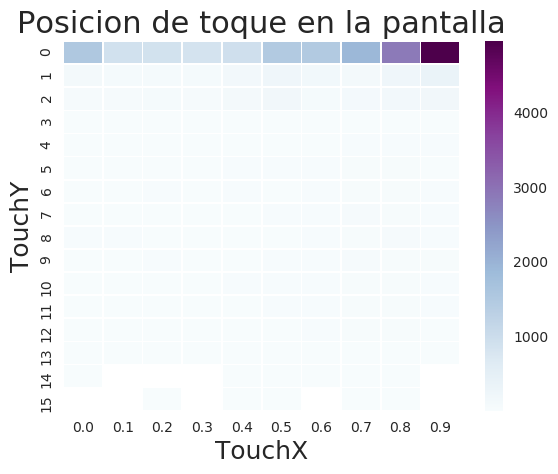

In [10]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Posicion de toque en la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18)

Parece que todos le dan a sacar publicidad. Hay que ver donde hacen click los usuarios que instalan el producto. O mas bien uno puede usar eso para que el usuario clickee instalar en lugar de la cruz.

In [54]:
anunciantes = clicks['advertiser_id'].value_counts()
anunciantes_log= np.log(anunciantes+1)
anunciantes_log

3                  10.18
0                   4.26
2                   2.56
7                   1.10
1                   1.10
8                   0.69
5                   0.69
Name: advertiser_id, dtype: float64

Text(0,0.5,'Anunciantes')

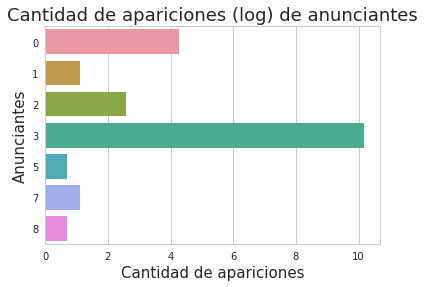

In [55]:
'''
Grafico de barras de pagos de anunciantes para el anuncio.
'''

g = sns.barplot(x=anunciantes_log.values, y=anunciantes_log.index, orient='h')
g.set_title("Cantidad de pagos (log) de anunciantes", fontsize=18)
g.set_xlabel("Cantidad de apariciones", fontsize=15)
g.set_ylabel("Anunciantes", fontsize=15)

# Analisis de Installs

In [185]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null datetime64[ns]
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 433.2+ KB


## Que apps aparecen?

In [223]:
app = installs['application_id'].value_counts()
app_log= np.log(app+1)
app_log

7                    6.85
9                    6.60
10                   5.97
16                   5.89
8                    5.80
2                    5.16
29                   4.58
20                   4.56
6                    3.58
1                    3.56
26                   3.37
34                   3.37
15                   3.04
0                    2.94
3                    2.89
28                   2.89
12                   2.77
18                   2.71
24                   2.64
17                   2.64
14                   2.64
21                   2.08
5                    1.39
13                   1.39
33                   1.10
30                   1.10
19                   1.10
32                   1.10
36                   0.69
4                    0.69
23                   0.69
Name: application_id, dtype: float64

Text(0,0.5,'App')

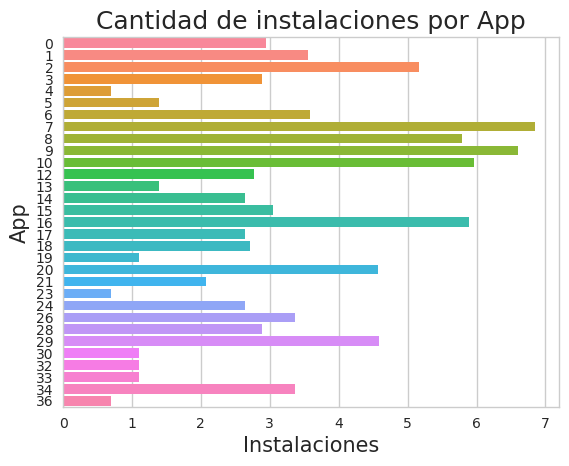

In [224]:
'''
Grafico de barras de aparicion de apps.
'''

g = sns.barplot(x=app_log.values, y=app_log.index, orient='h', saturation = 2)
g.set_title("Cantidad de instalaciones por App", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("App", fontsize=15)

Hay una clara diferencia entre las aplicaciones 7 y 9 respecto de las demas.
Veamos cuanto abarcan realmente:

In [273]:
def top2Apps(app):
    if (app == 7 or app == 9):
        return app
    return 'Otro'

In [274]:
installs['appGeneralizado'] = installs['application_id'].apply(top2Apps)
topApp = installs['appGeneralizado'].value_counts()

Text(0,0.5,'')

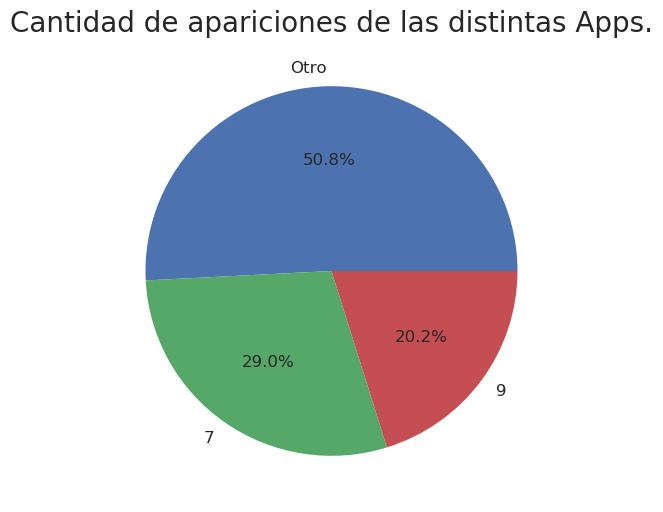

In [275]:
'''
Grafico pie de las apps.
'''
g = topApp.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de apariciones de las distintas Apps.",fontsize=20)
g.set_ylabel("")

Entre estas dos aplicaciones abarcan casi el 50% de las apariciones de aplicaciones.

## Que pasa respecto a los dias y horas?

In [264]:
'''
Separo la fecha de creacion en dia mes y anio
'''
installs['anio'] = installs['created'].apply(lambda x: x.year)
installs['mes'] = installs['created'].apply(lambda x: x.month)
installs['dia'] = installs['created'].apply(lambda x: x.day)
installs['hora'] = installs['created'].apply(lambda x: x.hour)
installs['minuto'] = installs['created'].apply(lambda x: x.minute)

installs['diaDeLaSemana'] = installs['created'].apply(lambda x: x.dayofweek)
installs = installs.drop(['created'], axis=1)
installs.head()

,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,wifi,trans_id,ip_address,device_language,anio,mes,dia,hora,minuto,diaDeLaSemana
0,0,1891515180541284343,8464844987297247076,nan,False,False,6333597102633388268,"308,305,860,557,778,688.00","4,445,252,312,759,721,472.00",NaN,...,NaN,NaN,5529284367937637301,nan,2019,3,13,1,43,2
1,0,1891515180541284343,3250564871270161533,nan,False,False,6333597102633388268,"308,305,860,557,778,688.00","4,445,252,312,759,721,472.00",NaN,...,NaN,NaN,6098022721363533304,nan,2019,3,13,4,58,2
2,0,1891515180541284343,7953318831018100268,nan,False,True,6333597102633388268,"513,799,204,676,421,248.00","6,026,543,327,929,207,808.00",HasOffers Mobile AppTracking v1.0,...,NaN,NaN,4636407223847323867,"3,301,377,775,977,699,840.00",2019,3,13,4,20,2
3,0,1891515180541284343,7953318831018100268,nan,False,False,6333597102633388268,"513,799,204,676,421,248.00","6,026,543,327,929,207,808.00",NaN,...,NaN,NaN,4636407223847323867,nan,2019,3,13,4,20,2
4,0,1891515180541284343,8355110941557237501,nan,False,True,6333597102633388268,"1,083,368,711,068,077,952.00","7,876,611,839,898,798,080.00",HasOffers Mobile AppTracking v1.0,...,NaN,NaN,685400811232710215,"3,301,377,775,977,699,840.00",2019,3,10,22,24,6


In [265]:
installs['anio'].value_counts()

2019    3412
Name: anio, dtype: int64

In [266]:
installs['mes'].value_counts()

3    3412
Name: mes, dtype: int64

No parece haber una variedad significativa como para analizar las diferencias entre los valores. Los quito del df.

In [267]:
installs['dia'].value_counts()

12    472
13    423
7     393
11    377
9     368
8     366
10    351
5     337
6     325
Name: dia, dtype: int64

In [268]:
'''
Me quedo con una semana sin dias de la semana repetidos.
'''
installs = installs.loc[installs['dia'] <= 11]

In [269]:
'''
Quedo solo con dia, hora, minutos y segundos (respecto al tiempo).
'''
installs = installs.drop(['anio','mes'], axis=1)

In [270]:
installs['aparicion'] = 1
for_heatmap = installs.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')

Text(50.7222,0.5,'Dia')

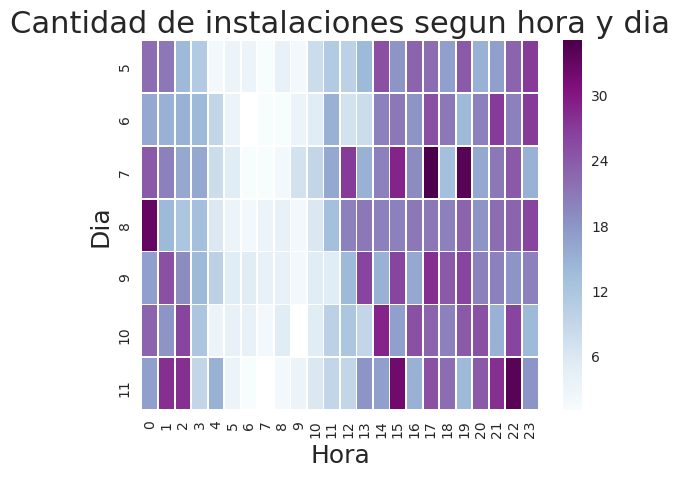

In [271]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de instalaciones segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

Podemos ver una disminucion de instalaciones entre las 3hs. y las 10hs.

In [276]:
installsPorDiaDeSemana = installs.groupby('diaDeLaSemana')['appGeneralizado'].value_counts().to_frame()
installsPorDiaDeSemana.columns = ['cantidad']
installsPorDiaDeSemana = installsPorDiaDeSemana.unstack()
installsPorDiaDeSemana

cantidad          
appGeneralizado        7    9 Otro
diaDeLaSemana                     
0                     97   74  206
1                    114   60  163
2                    102   82  141
3                    122  100  171
4                    108   85  173
5                     97   53  218
6                     90   54  207

Text(0.5,0,'Dia de la semana')

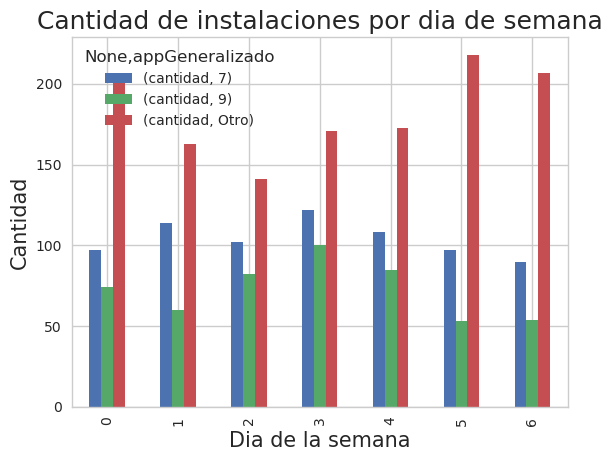

In [277]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = installsPorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

Podemos ver que e su mayoria, las aplicacion 7 es instalada con mas frecuencia los dias martes y jueves, la aplicacion 9 los dias miercoles, jueves y viernes, y otra aplicaciones los sabados, domingos y lunes.
Por otro lado, solo contamos con la informacion de una semana, por lo que no podemos asegurar que este sea un comportamiento general de las instalaciones.
Tambien podria verse como patron como las dos aplicaciones con mas instalaciones aumentan su numero de las mismas a medida que nos acercamos a la mitad e la semana, para luego decrementar. Lo contrario sucede con las aplicaiones con menos instalaciones.

## Hay un ref_type que aparezca mucho mas que otro?

In [230]:
aparicionesRefType = installs['ref_type'].value_counts()
aparicionesRefType

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

Text(0,0.5,'Ref_Type')

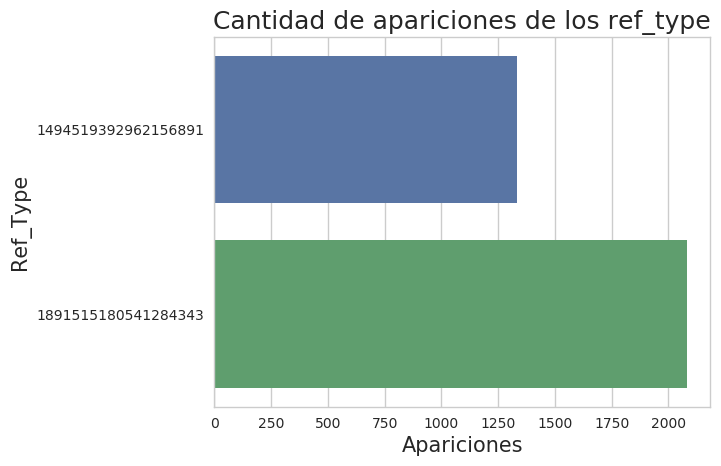

In [231]:
'''
Grafico de barras de apariciones de los ref_type.
'''

g = sns.barplot(x=aparicionesRefType.values, y=aparicionesRefType.index, orient='h')
g.set_title("Cantidad de apariciones de los ref_type", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Ref_Type", fontsize=15)

Las apariciones de 1891515180541284343 son casi del doble de las de 1494519392962156891.

Text(0,0.5,'Cantidad')

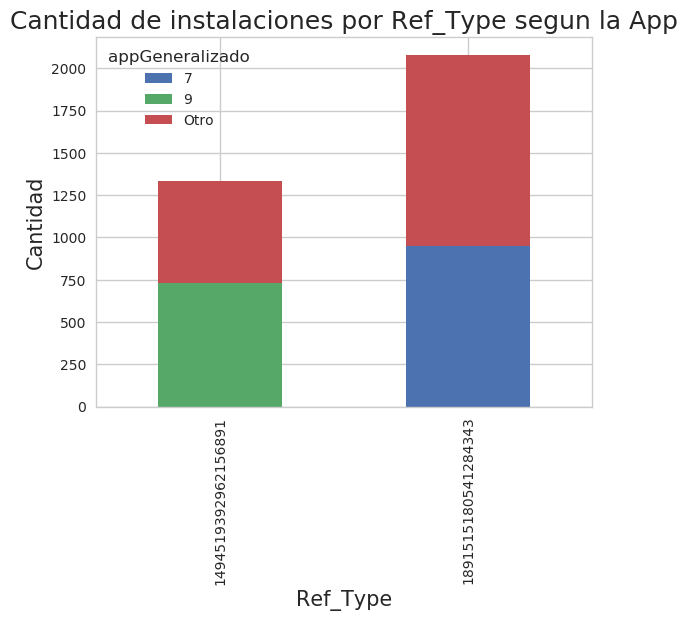

In [232]:
g = installs.groupby(['ref_type', 'appGeneralizado'])['ref_type'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por Ref_Type segun la App", fontsize=18)
g.set_xlabel("Ref_Type", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Podemos ver algo interesante. Parece ser que la aplicaion 9 es instalada casi por completo (si es que no es por completo) por ref_types de tipo 1494519392962156891, mientras que la aplicacion 7 es instalada a traves de 1891515180541284343.
Por otro lado, puede que la reparticion de estas dos aplicaciones entre ambos ref_types sea tan marcada debido a que son compatibles con solo uno de los tipos de dispositivo.
Tambien podria darse esto por la complementacion a los respectivos dispositivos, contando uno con una caracteristica que el otro no posee y viseversa.

In [278]:
ref_typePorDiaDeSemana = installs.groupby('diaDeLaSemana')['ref_type'].value_counts().to_frame()
ref_typePorDiaDeSemana.columns = ['cantidad']
ref_typePorDiaDeSemana = ref_typePorDiaDeSemana.unstack()
ref_typePorDiaDeSemana

cantidad                    
ref_type      1494519392962156891 1891515180541284343
diaDeLaSemana                                        
0                             131                 246
1                             130                 207
2                             138                 187
3                             164                 229
4                             142                 224
5                             140                 228
6                             132                 219

Text(0.5,0,'Dia de la semana')

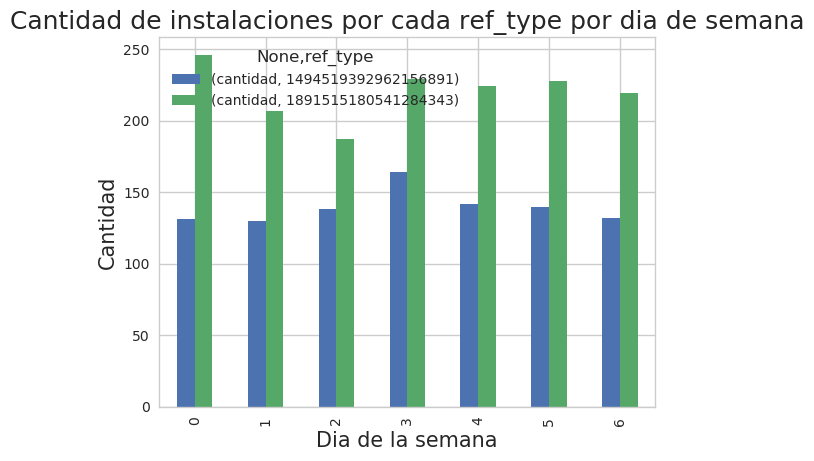

In [281]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = ref_typePorDiaDeSemana.plot.bar()
g.set_title("Cantidad de instalaciones por cada ref_type por dia de semana", fontsize=18)
g.set_ylabel("Cantidad", fontsize=15)
g.set_xlabel("Dia de la semana", fontsize=15)

## Cual es el margen de instalaciones implicitas?

In [317]:
implicitas = installs['implicit'].value_counts().to_frame().reset_index()
implicitas['index'] = implicitas['index'].apply(lambda x: 'No implicita' if not x else 'Implicita')
implicitas = implicitas.set_index(['index'])
implicitas

,implicit
index,
No implicita,1878
Implicita,639


Text(0,0.5,'Es implicita?')

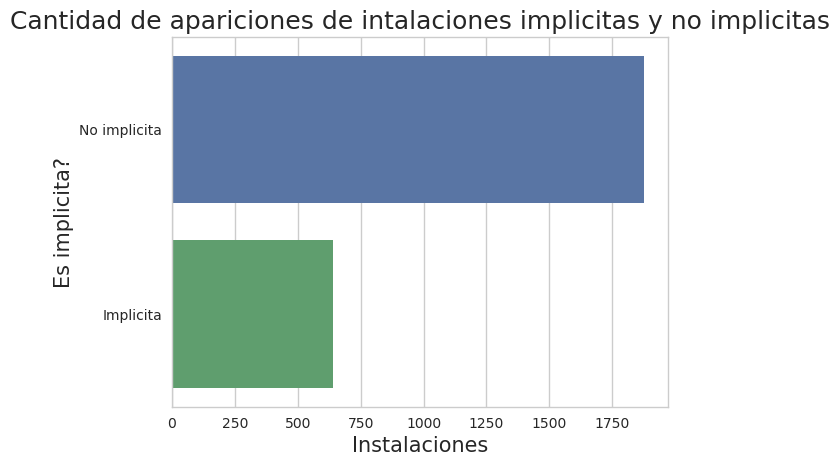

In [318]:
'''
Grafico de barras de instalaciones implicitas y no implicitas.
'''

g = sns.barplot(x=implicitas['implicit'].values, y=implicitas['implicit'].index, orient='h')
g.set_title("Cantidad de apariciones de intalaciones implicitas y no implicitas", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Es implicita?", fontsize=15)

Text(0,0.5,'Cantidad')

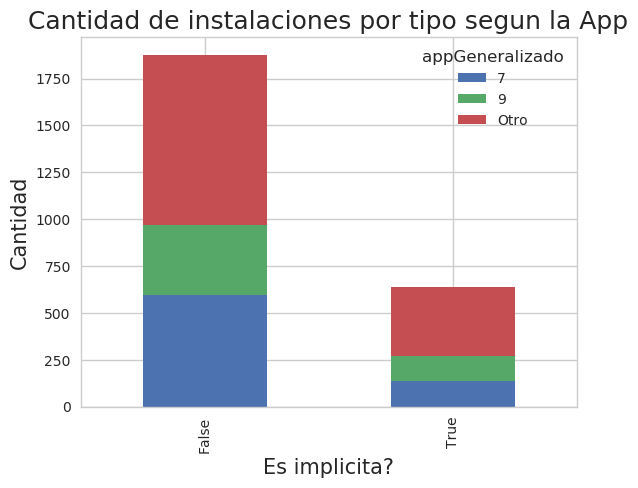

In [319]:
g = installs.groupby(['implicit', 'appGeneralizado'])['implicit'].count().unstack('appGeneralizado').fillna(0) 
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones por tipo segun la App", fontsize=18)
g.set_xlabel("Es implicita?", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)

Si bien las instalaciones de tipo no implicito abarcan la gran mayoria de las instalaciones, la aplicacion 7 se ve proporcionalmente mas intalada de modo no implicito. Mientras, la aplicacion 9 cuenta con un mayor porcentage de instalaciones en las de tipo implicitas.

## Paises?

In [19]:
paises = installs['device_countrycode'].value_counts()
paises

6333597102633388268    1820
2970470518450881158    1592
Name: device_countrycode, dtype: int64

Text(0,0.5,'Pais')

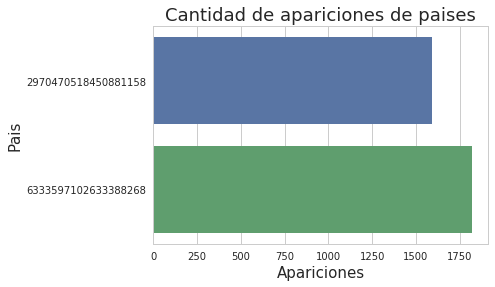

In [20]:
'''
Grafico de barras de apariciones de paises.
'''

g = sns.barplot(x=paises.values, y=paises.index, orient='h')
g.set_title("Cantidad de apariciones de paises", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Pais", fontsize=15)

Ambos paises estan muy parejos.

## Marca de dispositivo

In [320]:
marcas = installs['device_brand'].value_counts()
marcas_log= np.log(marcas+1)
marcas_log

308,305,860,557,778,688.00                     5.82
2,208,834,667,126,999,296.00                   4.76
2,523,245,982,232,924,160.00                   4.28
5,951,324,980,112,395,264.00                   4.08
2,987,569,314,309,514,240.00                   3.58
3,812,620,986,737,351,168.00                   3.33
513,799,204,676,421,248.00                     3.14
6,538,561,794,435,555,328.00                   3.04
3,228,516,090,903,640,064.00                   2.20
1,083,368,711,068,077,952.00                   2.08
4,371,307,750,970,992,640.00                   1.79
2,262,848,417,324,907,264.00                   1.61
3,849,490,426,089,584,640.00                   1.61
3,093,165,991,971,728,896.00                   1.39
8,285,870,045,665,421,312.00                   1.39
823,004,501,329,528,832.00                     1.39
5,645,691,558,423,168,000.00                   1.10
3,742,387,098,176,766,976.00                   1.10
6,111,646,853,627,295,744.00                   1.10
9,169,526,52

Text(0,0.5,'Marca')

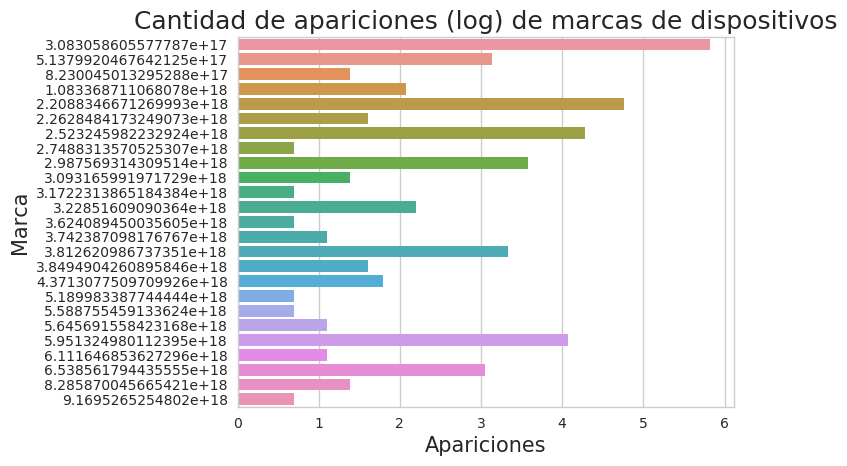

In [321]:
'''
Grafico de barras de apariciones de marcas de dispositivos.
'''

g = sns.barplot(x=marcas_log.values, y=marcas_log.index, orient='h')
g.set_title("Cantidad de apariciones (log) de marcas de dispositivos", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Marca", fontsize=15)

In [392]:
modeloYMarca = installs.groupby(['device_brand','device_model'])['application_id'].count().to_frame()
modeloYMarca = modeloYMarca.loc[modeloYMarca['application_id']>10].reset_index()[['device_brand','application_id']]
modeloYMarca

,device_brand,application_id
0,"308,305,860,557,778,688.00",13
1,"308,305,860,557,778,688.00",16
2,"308,305,860,557,778,688.00",11
3,"308,305,860,557,778,688.00",30
4,"308,305,860,557,778,688.00",17
5,"308,305,860,557,778,688.00",22
6,"2,208,834,667,126,999,296.00",15
7,"2,208,834,667,126,999,296.00",11


In [368]:
'''
Instalaciones en dispositivos de marca 308305860557778688.00 segun modelos con mas de 10 instalaciones.
'''
modelo1 = installs.loc[installs['device_brand'] == 308305860557778688.00].groupby('device_model')['application_id'].count().to_frame()
modelo1 = modelo1.loc[modelo1['application_id'] > 10]#.unstack('device_model')
modelo1

,application_id
device_model,
"206,643,138,237,712,480.00",13
"1,754,527,856,463,818,240.00",16
"3,409,614,172,132,638,720.00",11
"7,116,343,100,936,340,480.00",30
"7,787,530,752,469,096,448.00",17
"9,098,443,153,716,766,720.00",22


Text(0,0.5,'Cantidad')

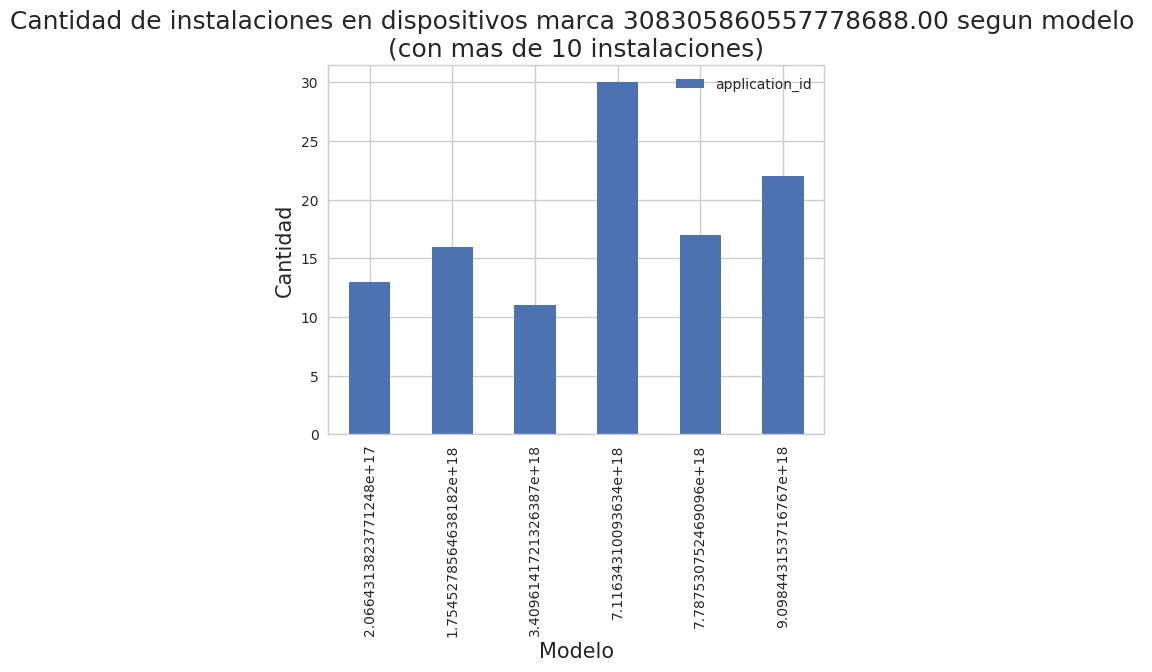

In [369]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo1
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 308305860557778688.00 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


In [371]:
'''
Instalaciones en dispositivos de marca 2208834667126999296.00 segun modelos con mas de 10 instalaciones.
'''
modelo2 = installs.loc[installs['device_brand'] == 2208834667126999296.00].groupby('device_model')['application_id'].count().to_frame()
modelo2 = modelo1.loc[modelo2['application_id'] > 10]#.unstack('device_model')
modelo2

,application_id
device_model,
"3,057,402,324,801,471,488.00",15
"7,313,748,131,250,193,408.00",11


Text(0,0.5,'Cantidad')

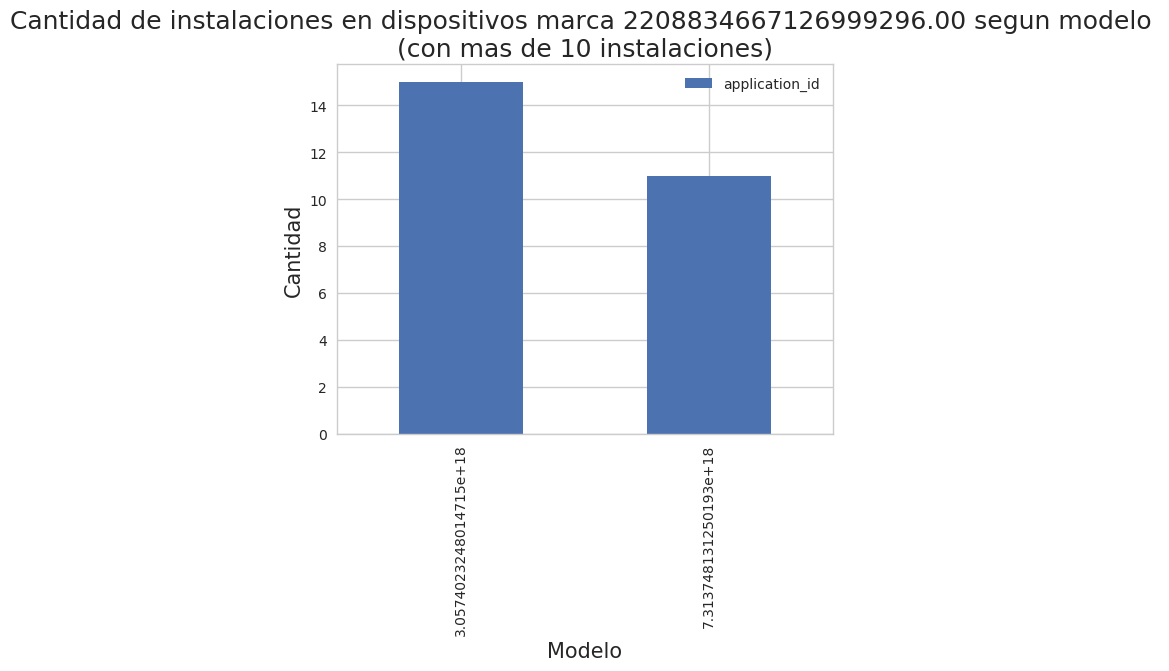

In [373]:
'''
Grafico de barras de instalacion por dia de semana.
'''
g = modelo1
g = g.plot(kind='bar', stacked=True)
g.set_title("Cantidad de instalaciones en dispositivos marca 2208834667126999296.00 segun modelo \n(con mas de 10 instalaciones)", fontsize=18)
g.set_xlabel("Modelo", fontsize=15)
g.set_ylabel("Cantidad", fontsize=15)


## Agente usado para la instalacion

In [394]:
instaladores = installs['session_user_agent'].value_counts().head(3)
instaladores

adjust.com                           1240
http-kit/2.0                         1204
HasOffers Mobile AppTracking v1.0      19
Name: session_user_agent, dtype: int64

Text(0,0.5,'Instalador')

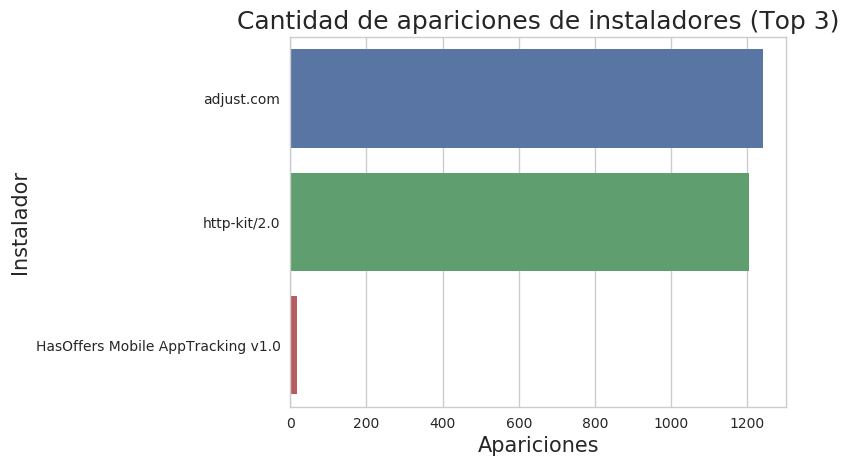

In [395]:
'''
Grafico de barras de apariciones de instaladores.
'''

g = sns.barplot(x=instaladores.values, y=instaladores.index, orient='h')
g.set_title("Cantidad de apariciones de instaladores (Top 3)", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Instalador", fontsize=15)

## User agent

In [407]:
installs['agentes'] = installs['user_agent'].dropna().apply(lambda x: str(x).split('/')[0])
agentesUsuario = installs['agentes'].value_counts()
agentesUsuario

Dalvik         661
MercadoPago    508
NextGen         17
HotelUrbano     10
PeixeUrbano      6
Mozilla          1
takealot         1
Name: agentes, dtype: int64

Text(0,0.5,'Agente de Usuario')

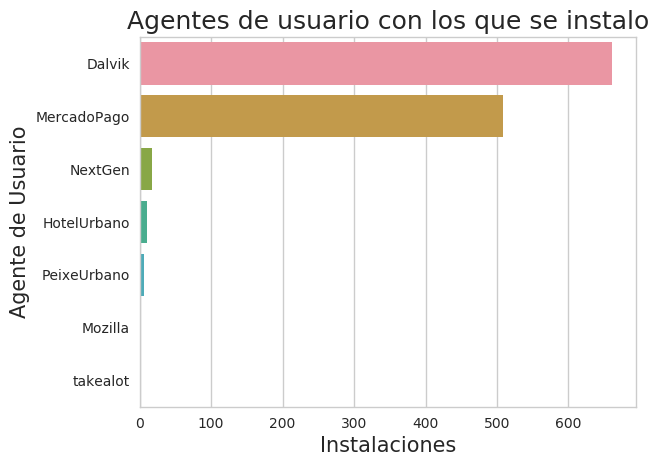

In [409]:
'''
Grafico de barras de apariciones de agentes de usuario.
'''

g = sns.barplot(x=agentesUsuario.values, y=agentesUsuario.index, orient='h')
g.set_title("Agentes de usuario con los que se instalo", fontsize=18)
g.set_xlabel("Instalaciones", fontsize=15)
g.set_ylabel("Agente de Usuario", fontsize=15)

## Tipo de instalacion

In [420]:
installs['kind'].value_counts()

af_app_opened                 303
app_open                      167
EVENT_Homepage                 54
EVENT_OPEN_APP                 27
open                           27
Open                           19
login_success                  10
account_summary_first_step      7
EVENT_LISTINGVIEW_FLIGHT        5
EVENT_HOMEPAGE                  4
deeplink                        4
reattribution                   3
payment method add              2
af_list_view                    1
install                         1
journey reserved                1
journey first drop off          1
journey drop off                1
EVENT_PROMO                     1
registration                    1
Name: kind, dtype: int64

In [421]:
def reducirTipos(tipo):
    tipo = str(tipo).lower()
    palabrasDelTipo = tipo.split('_')
    if ('open' in palabrasDelTipo) or ('opened' in palabrasDelTipo):
        return 'open'
    return str(tipo)

In [422]:
installs['kind'] = installs['kind'].dropna().apply(reducirTipos)

In [423]:
tiposDeInstalacion = installs['kind'].value_counts()
tiposDeInstalacion

open                          543
event_homepage                 58
login_success                  10
account_summary_first_step      7
event_listingview_flight        5
deeplink                        4
reattribution                   3
payment method add              2
journey drop off                1
journey first drop off          1
event_promo                     1
install                         1
journey reserved                1
af_list_view                    1
registration                    1
Name: kind, dtype: int64

Text(0,0.5,'Tipo de instalacion')

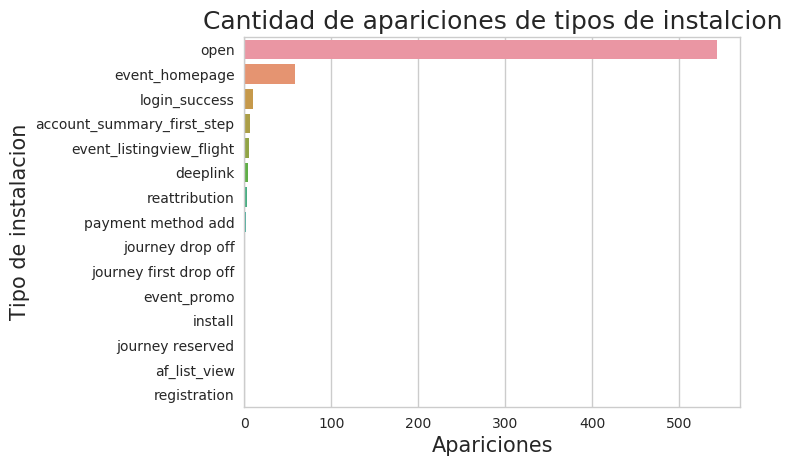

In [424]:
'''
Grafico de barras de apariciones de tipos de instalacion.
'''

g = sns.barplot(x=tiposDeInstalacion.values, y=tiposDeInstalacion.index, orient='h')
g.set_title("Cantidad de apariciones de tipos de instalcion", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Tipo de instalacion", fontsize=15)

## Wifi

In [425]:
wifi = installs['wifi'].value_counts()
wifi

True     959
False    245
Name: wifi, dtype: int64

Text(0,0.5,'')

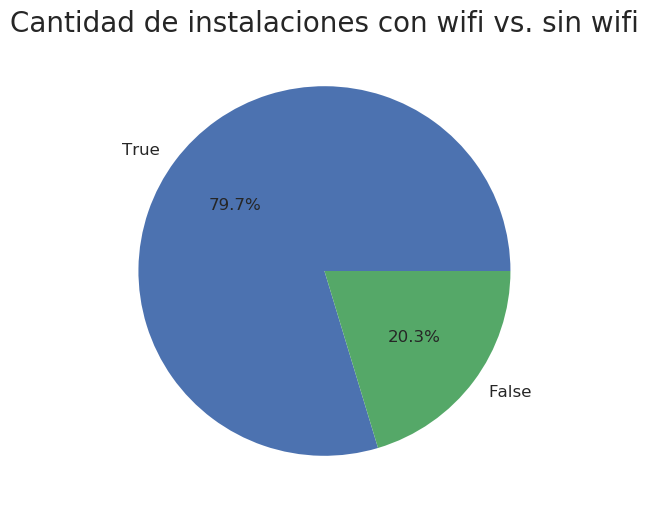

In [426]:
'''
Grafico de instalaciones con wifi vs sin wifi.
'''
g = wifi.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),fontsize=12)
g.set_title("Cantidad de instalaciones con wifi vs. sin wifi",fontsize=20)
g.set_ylabel("")

## Device Language

In [427]:
topLeng = installs['device_language'].value_counts().head(10)
topLeng

3,301,377,775,977,699,840.00    1152
9,028,382,655,101,200,384.00     475
4,621,024,053,086,952,448.00     434
6,977,049,253,562,486,784.00     182
407,706,219,895,259,712.00        61
1,526,421,427,153,981,440.00      40
4,060,929,664,968,129,024.00      35
282,284,336,961,851,904.00        32
6,035,179,960,508,535,808.00      18
1,193,278,617,981,593,088.00      15
Name: device_language, dtype: int64

Text(0,0.5,'Leng')

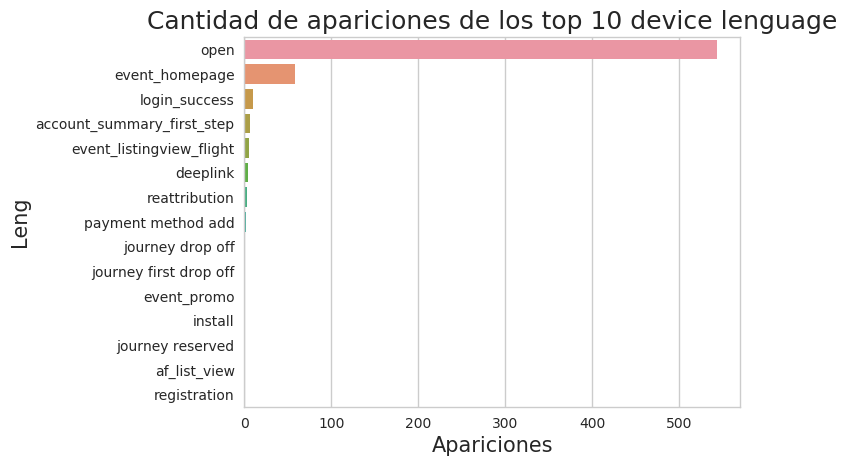

In [428]:
'''
Grafico de barras de apariciones de device lenguage.
'''

g = sns.barplot(x=tiposDeInstalacion.values, y=tiposDeInstalacion.index, orient='h')
g.set_title("Cantidad de apariciones de los top 10 device lenguage", fontsize=18)
g.set_xlabel("Apariciones", fontsize=15)
g.set_ylabel("Leng", fontsize=15)

## Ref type por dia y hora

In [429]:
refType1 = installs.loc[installs['ref_type'] == 1891515180541284343]

Text(50.7222,0.5,'Dia')

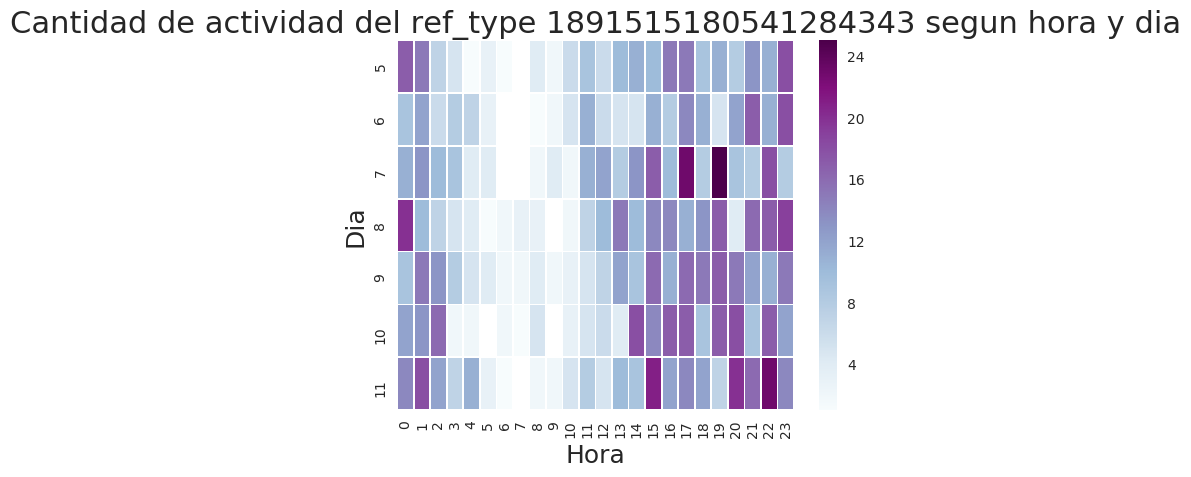

In [430]:
for_heatmap = refType1.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de actividad del ref_type 1891515180541284343 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

In [431]:
refType2 = installs.loc[installs['ref_type'] == 1494519392962156891]

Text(50.7222,0.5,'Dia')

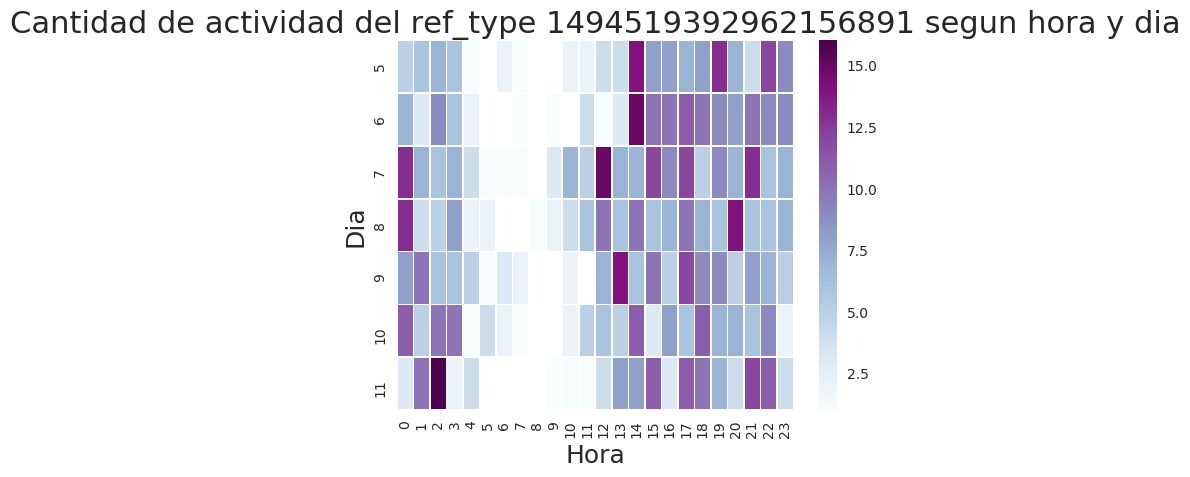

In [432]:
for_heatmap = refType2.pivot_table(index='dia', columns='hora', values='aparicion', aggfunc='sum')
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de actividad del ref_type 1494519392962156891 segun hora y dia", fontsize=22)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Dia", fontsize=18)

# Analisis con Joins